#Fake Currency

**Import Libraries**

In [1]:
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


**Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Set File location**

In [3]:

train_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
test_location = "/content/drive/MyDrive/Colab Notebooks/fake currency/datasetnew"
filepath = '/content/drive/MyDrive/Colab Notebooks/fake currency/Model/model5_vgg16.keras'

**Image preprocessing**

In [4]:
preprocess_input = tensorflow.keras.applications.vgg16.preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

**Set Parameters**

In [5]:
img_size=224        #Vgg16 input layer size
batch_size=48
num_class=12      #Number of classification

**Load all images from directory**

In [6]:
# Complete Dataset images can be loaded using ImageDataGenerator function

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory(train_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

datagen_test=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_test.flow_from_directory(test_location,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)


Found 2842 images belonging to 12 classes.
Found 2842 images belonging to 12 classes.


**Import Vgg16 Libraries**

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

**Create Vgg model**

In [8]:
vgg = VGG16(input_shape=[img_size,img_size] + [3], weights='imagenet', include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Show vgg16 Architecture**

In [9]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Create Fake Currency detection Model**

In [10]:
for layer in vgg.layers:
  layer.trainable = False

In [11]:
x = Flatten()(vgg.output)
prediction = Dense(num_class, activation='softmax')(x)

In [12]:
detection = Model(inputs=vgg.input, outputs=prediction)


**show the detection model**

In [13]:
detection.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │         301,068 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 15,015,756 (57.28 MB)

 Trainable params: 301,068 (1.15 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**set Trainable parameters**

In [14]:
optimum=Adam(learning_rate=0.005)
detection.compile(optimizer=optimum,loss='categorical_crossentropy',metrics=['accuracy'])


In [15]:
print(train_generator.class_indices)

{'1Hundredfake': 0, '1Hundrednote': 1, '2Hundrednote': 2, '5Hundrednote': 3, 'Fiftynote': 4, 'Tennote': 5, 'Twentynote': 6, 'fake_10': 7, 'fake_20': 8, 'fake_200': 9, 'fake_50': 10, 'fake_500': 11}


In [16]:
TRAIN_STEPS=train_generator.n//train_generator.batch_size
TRAIN_STEPS

59

In [17]:
VALIDATION_STEPS=validation_generator.n//validation_generator.batch_size
VALIDATION_STEPS

59

In [18]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [19]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.5,
                              patience=2,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

In [20]:
callbacks_list = [checkpoint, reduce_lr]

**Start Training using Vgg16 model**

In [21]:
history = detection.fit(train_generator,
                              steps_per_epoch=TRAIN_STEPS,
                              #class_weight=class_weights,
                              validation_data=validation_generator,
                              validation_steps=VALIDATION_STEPS,
                              epochs=15,
                              verbose=1,
                              callbacks=callbacks_list
                             )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.3912 - loss: 83.2080 
Epoch 1: val_accuracy improved from -inf to 0.75071, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model4_vgg16.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 1090s 18s/step - accuracy: 0.3932 - loss: 82.8870 - val_accuracy: 0.7507 - val_loss: 25.7570 - learning_rate: 0.0050
Epoch 2/15
 1/59 ━━━━━━━━━━━━━━━━━━━━ 18s 313ms/step - accuracy: 0.7292 - loss: 33.0145

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.75071 to 0.75494, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model4_vgg16.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 54s 932ms/step - accuracy: 0.7292 - loss: 33.0145 - val_accuracy: 0.7549 - val_loss: 25.3020 - learning_rate: 0.0050
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.7307 - loss: 31.3841
Epoch 3: val_accuracy improved from 0.75494 to 0.76518, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model4_vgg16.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.7305 - loss: 31.4907 - val_accuracy: 0.7652 - val_loss: 34.1893 - learning_rate: 0.0050
Epoch 4/15
 1/59 ━━━━━━━━━━━━━━━━━━━━ 15s 260ms/step - accuracy: 0.6875 - loss: 48.6341
Epoch 4: val_accuracy improved from 0.76518 to 0.76624, saving model to /content/drive/MyDrive/Colab Notebooks/fake currency/Model/model4_vgg16.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 55s 951ms/step - accuracy: 0.6875 - loss: 48.6341 - val_accur

**Plot accuracy and loss graph**

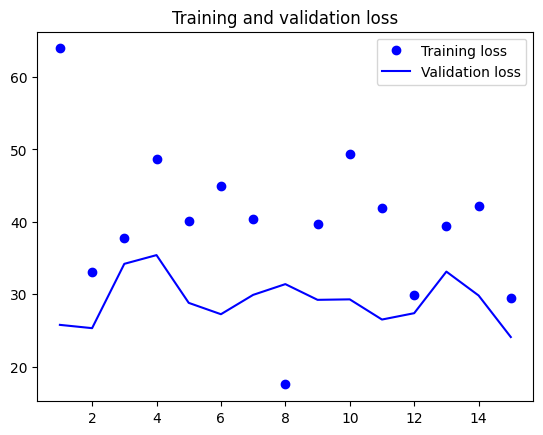

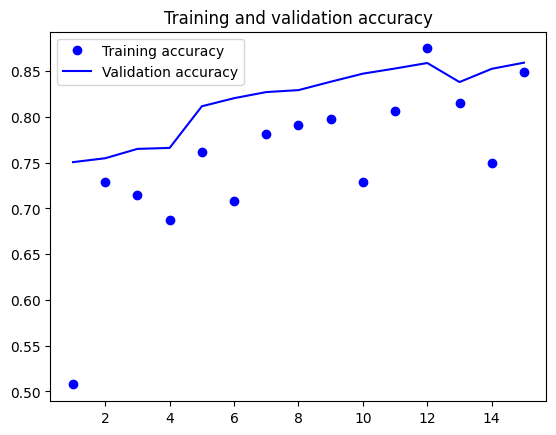

<Figure size 640x480 with 0 Axes>

In [22]:
# display the loss and accuracy curves

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()